In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

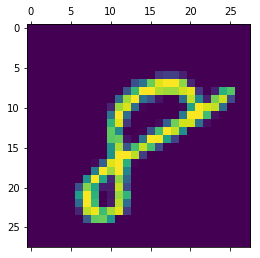

In [11]:
plt.matshow(x_train[59999])

In [8]:
x_train = x_train/255
x_test=x_test/255

In [9]:
x_train[59999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 3ms/step - loss: 0.6482 - accuracy: 0.8373 - val_loss: 0.3593 - val_accuracy: 0.9023
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3369 - accuracy: 0.9063 - val_loss: 0.2912 - val_accuracy: 0.9191
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2879 - accuracy: 0.9197 - val_loss: 0.2599 - val_accuracy: 0.9279
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9285 - val_loss: 0.2347 - val_accuracy: 0.9340
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2349 - accuracy: 0.9341 - val_loss: 0.2179 - val_accuracy: 0.9373
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2164 - accuracy: 0.9394 - val_loss: 0.2019 - val_accuracy: 0.9418
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2006 - accuracy: 0.9441 - val_loss: 0.1878 - val_accuracy

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9624
Loss=0.130
Accuracy=0.962


<function matplotlib.pyplot.show(*args, **kw)>

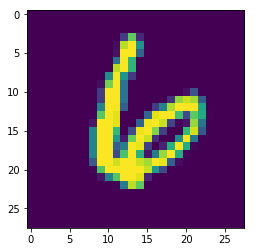

In [16]:
n=random.randint(23,999)
plt.imshow(x_test[n])
plt.show

In [17]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 2s 1ms/step
Handwritten number in the image is= 6


In [18]:
history.history??

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

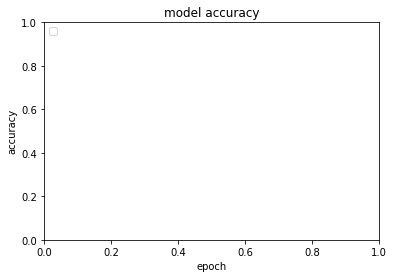

In [22]:
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc="upper left")
plt.show()

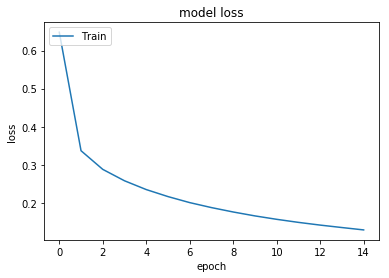

In [21]:
plt.plot(history.history["loss"])
plt.title(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc="upper left")
plt.show()